In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd
import os
import sys
from fbprophet import Prophet
from matplotlib import pyplot
from pandas import to_datetime

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving canada_federal_covid_stats.csv to canada_federal_covid_stats.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['canada_federal_covid_stats.csv']))

In [ ]:
df

,id,date,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,population,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index,iso_alpha_3,iso_alpha_2,iso_numeric,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility,level_ind
0,CAN,2020-01-01,0.0,0,0,0,0,0.0,0,0,37057765,0,0,0,0,0,0,0,0,0,0,0,0.00,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
1,CAN,2020-01-02,0.0,0,0,0,0,0.0,0,0,37057765,0,0,0,0,0,0,0,0,0,0,0,0.00,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
2,CAN,2020-01-03,0.0,0,0,0,0,0.0,0,0,37057765,0,0,0,0,0,0,0,0,0,0,0,0.00,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
3,CAN,2020-01-04,0.0,0,0,0,0,0.0,0,0,37057765,0,0,0,0,0,0,0,0,0,0,0,0.00,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
4,CAN,2020-01-05,0.0,0,0,0,0,0.0,0,0,37057765,0,0,0,0,0,0,0,0,0,0,0,0.00,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,CAN,2021-02-09,1119294.0,17483364,815487,756588,20914,2997.0,0,671,37057765,3,3,2,4,1,2,2,4,2,2,1,75.46,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
406,CAN,2021-02-10,1153987.0,17483364,818755,760476,21007,2975.0,0,669,37057765,3,3,2,4,1,2,2,4,2,2,1,75.46,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
407,CAN,2021-02-11,1186400.0,17483364,821932,763979,21089,2816.0,0,635,37057765,3,3,2,4,1,2,2,4,2,2,1,75.46,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1
408,CAN,2021-02-12,1186400.0,17483364,824611,767170,21168,2816.0,0,635,37057765,3,3,2,4,1,2,2,4,2,2,1,75.46,CAN,CA,124.0,CAD,1,Canada,NaN,NaN,44.784047,-82.508593,NaN,Canada,CA,1


In [ ]:
covid_df = df [['date', 'deaths']]
covid_df.columns = ['ds', 'y']
covid_df['ds']= to_datetime(covid_df['ds'])
covid_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2020-01-01,0
1,2020-01-02,0
2,2020-01-03,0
3,2020-01-04,0
4,2020-01-05,0
...,...,...
405,2021-02-09,20914
406,2021-02-10,21007
407,2021-02-11,21089
408,2021-02-12,21168


In [ ]:
covid_df.plot()
#pyplot.show()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4d8f27fa60> (for post_execute):


ValueError: ignored

ValueError: ignored

In [ ]:
m = Prophet()
m.fit(covid_df)

future = m.make_future_dataframe(periods=365)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
770,2022-02-09
771,2022-02-10
772,2022-02-11
773,2022-02-12
774,2022-02-13


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,-1.230164,-126.695571,120.418679
1,2020-01-02,2.867237,-121.133096,119.314170
2,2020-01-03,1.531891,-122.873887,122.228242
3,2020-01-04,-5.771282,-131.796888,117.568588
4,2020-01-05,-10.995734,-135.991274,111.087947
...,...,...,...,...
770,2022-02-09,65973.731589,34279.125068,97470.025246
771,2022-02-10,66101.207023,34423.959261,97708.811827
772,2022-02-11,66223.249711,34463.046156,97956.080922
773,2022-02-12,66339.324571,34346.318308,98294.838102


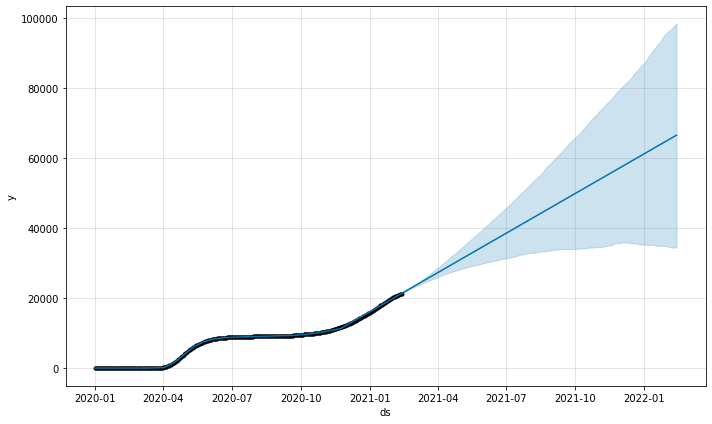

In [ ]:
fig1 = m.plot(forecast)


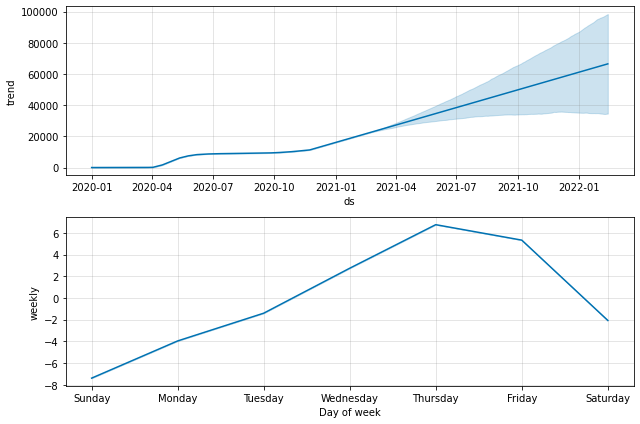

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


In [ ]:
plot_components_plotly(m, forecast)


In [ ]:
m1 = Prophet(interval_width=0.95,mcmc_samples=300, daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False, changepoint_prior_scale=2, uncertainty_samples=1000, seasonality_mode='additive', seasonality_prior_scale=10.0,)
forecast1 = m1.fit(covid_df).predict(future)


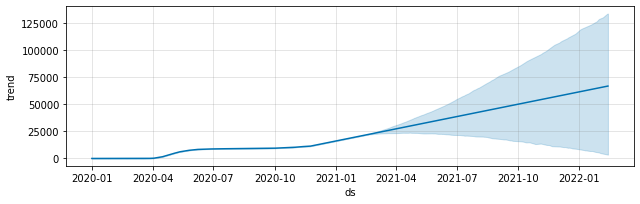

In [ ]:
fig11 = m1.plot_components(forecast1)


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='14 days', horizon = '14 days')
df_cv

from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-01-02 00:00:00 and 2021-01-30 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,576138.937110,759.038166,745.514660,0.041938,0.036906,0.0
1,3 days,643536.757045,802.207428,782.117772,0.043813,0.037679,0.0
2,4 days,730806.765664,854.872368,827.765106,0.046056,0.039143,0.0
3,5 days,819386.649813,905.199784,872.161505,0.048212,0.052915,0.0
4,6 days,921657.341127,960.029865,920.667498,0.050520,0.055639,0.0


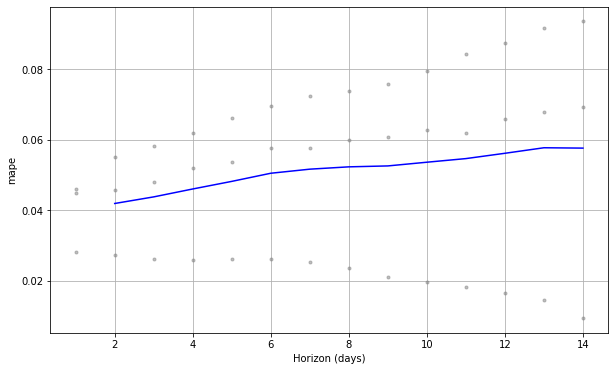

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [ ]:
df_cv1 = cross_validation(m1, initial='365 days', period='14 days', horizon = '14 days')
df_cv1

df_p1 = performance_metrics(df_cv1)
df_p1.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2021-01-02 00:00:00 and 2021-01-30 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,459381.326584,677.776753,665.426282,0.037413,0.033203,0.0
1,3 days,521900.452141,722.426780,703.755973,0.039419,0.034107,0.0
2,4 days,603821.632046,777.059606,751.418998,0.041805,0.035731,0.0
3,5 days,687825.072341,829.352200,798.165355,0.044119,0.048970,0.0
4,6 days,781328.283523,883.927759,846.578380,0.046451,0.051785,0.0


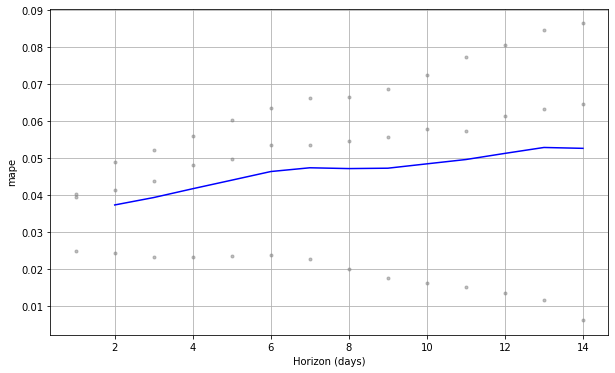

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv1, metric='mape')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving toronto_weather_data_monthly.csv to toronto_weather_data_monthly.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['toronto_weather_data_monthly.csv']))
df['month_end_date'] = ''
df

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Mean Max Temp (°C),Mean Max Temp Flag,Mean Min Temp (°C),Mean Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Extr Max Temp (°C),Extr Max Temp Flag,Extr Min Temp (°C),Extr Min Temp Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,month_end_date
0,-79.4,43.67,TORONTO,6158350,1840-01,1840,1,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,
1,-79.4,43.67,TORONTO,6158350,1840-02,1840,2,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,
2,-79.4,43.67,TORONTO,6158350,1840-03,1840,3,5.2,NaN,-2.9,NaN,1.2,NaN,NaN,M,NaN,M,41.1,NaN,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,
3,-79.4,43.67,TORONTO,6158350,1840-04,1840,4,11.1,NaN,2.3,NaN,6.7,NaN,NaN,M,NaN,M,87.9,NaN,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,
4,-79.4,43.67,TORONTO,6158350,1840-05,1840,5,17.2,NaN,7.6,NaN,12.4,NaN,24.4,S,-0.6,NaN,105.7,NaN,0.0,NaN,105.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,-79.4,43.67,TORONTO,6158350,2006-08,2006,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2000,-79.4,43.67,TORONTO,6158350,2006-09,2006,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2001,-79.4,43.67,TORONTO,6158350,2006-10,2006,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.3,I,0.0,T,95.3,I,0.0,NaN,NaN,NaN,NaN,NaN,
2002,-79.4,43.67,TORONTO,6158350,2006-11,2006,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,NaN,0.0,T,98.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,


In [ ]:
df[['Year','Month', 'Date/Time']]

,Year,Month,Date/Time
0,1840,1,1840-01
1,1840,2,1840-02
2,1840,3,1840-03
3,1840,4,1840-04
4,1840,5,1840-05
...,...,...,...
1999,2006,8,2006-08
2000,2006,9,2006-09
2001,2006,10,2006-10
2002,2006,11,2006-11


In [ ]:
type(df.Year)

pandas.core.series.Series

In [ ]:
month_end_date_list = []
import calendar
for yr in df.Year.to_list():
    for mth in range(1,13):
        #print(yr, mth)
        month_end_day = calendar.month(yr, mth).strip().replace('\n',' ').split(' ')[-1]
        month_end_date = str(yr) + '-' + str(mth).zfill(2) + '-' + str(month_end_day)
        month_end_date_list.append(month_end_date)
        df.loc[(df['Year'] == yr) & (df['Month'] == mth), 'month_end_date'] = month_end_date
month_end_date_list.sort()
df[['Year','Month', 'Date/Time','month_end_date']]
# month_end_date_list

,Year,Month,Date/Time,month_end_date
0,1840,1,1840-01,1840-01-31
1,1840,2,1840-02,1840-02-29
2,1840,3,1840-03,1840-03-31
3,1840,4,1840-04,1840-04-30
4,1840,5,1840-05,1840-05-31
...,...,...,...,...
1999,2006,8,2006-08,2006-08-31
2000,2006,9,2006-09,2006-09-30
2001,2006,10,2006-10,2006-10-31
2002,2006,11,2006-11,2006-11-30


In [ ]:
df.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Mean Max Temp (°C)',
       'Mean Max Temp Flag', 'Mean Min Temp (°C)', 'Mean Min Temp Flag',
       'Mean Temp (°C)', 'Mean Temp Flag', 'Extr Max Temp (°C)',
       'Extr Max Temp Flag', 'Extr Min Temp (°C)', 'Extr Min Temp Flag',
       'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)',
       'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag',
       'Snow Grnd Last Day (cm)', 'Snow Grnd Last Day Flag',
       'Dir of Max Gust (10's deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag', 'month_end_date'],
      dtype='object')

In [ ]:
weather_df = df[['month_end_date','Mean Temp (°C)']]
weather_df.columns = ['ds','y']

In [ ]:
m_weather = Prophet(interval_width=0.95,mcmc_samples=300, daily_seasonality=True, weekly_seasonality=False, yearly_seasonality=True, changepoint_prior_scale=2, uncertainty_samples=1000, seasonality_mode='additive', seasonality_prior_scale=10.0,)
forecast_weather = m_weather.fit(weather_df).predict(future)


To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv_weather = cross_validation(m_weather, initial='3650 days', period='3650 days', horizon = '365 days')
df_cv_weather

INFO:fbprophet:Making 16 forecasts with cutoffs between 1852-08-05 00:00:00 and 2002-06-30 00:00:00


To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1852-08-31,17.529953,14.244370,21.024389,18.2,1852-08-05
1,1852-09-30,12.087239,8.604530,15.672862,13.4,1852-08-05
2,1852-10-31,5.634620,1.779450,9.338552,8.8,1852-08-05
3,1852-11-30,0.563938,-3.268074,4.009473,1.6,1852-08-05
4,1852-12-31,-5.288539,-9.320289,-1.177129,-0.2,1852-08-05
...,...,...,...,...,...,...
187,2003-02-28,-3.191980,-6.613594,0.210954,-5.1,2002-06-30
188,2003-03-31,1.859704,-1.751923,5.401052,0.9,2002-06-30
189,2003-04-30,8.128576,4.636136,11.824143,6.2,2002-06-30
190,2003-05-31,14.325553,10.899725,17.852955,13.1,2002-06-30


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p_weather = performance_metrics(df_cv_weather)
df_p_weather.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,2.003834,1.415568,1.149535,0.043652,0.947368
1,40 days,2.012869,1.418756,1.151955,0.043652,0.947368
2,42 days,2.012939,1.418781,1.152581,0.043652,0.947368
3,45 days,1.967074,1.402524,1.123358,0.037922,0.947368
4,47 days,1.960994,1.400355,1.111080,0.037922,0.947368


INFO:fbprophet:Skipping MAPE because y close to 0
INFO:fbprophet:Skipping MAPE because y close to 0


TypeError: ignored

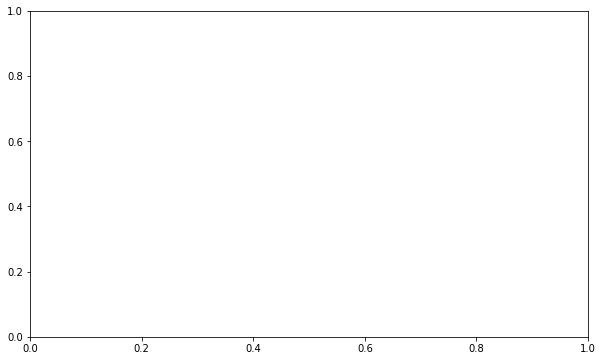

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig_weather = plot_cross_validation_metric(df_cv_weather, metric='mape')
